In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import joblib

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [4]:
data.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [6]:
data.isnull().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

In [7]:
data = data.drop(columns='Unnamed: 0')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

In [9]:
data.nunique()

cut                               11
color                             11
clarity                           11
carat_weight                     878
cut_quality                        6
lab                                3
symmetry                           5
polish                             5
eye_clean                          5
culet_size                         9
culet_condition                    4
depth_percent                    534
table_percent                    235
meas_length                     1415
meas_width                      1155
meas_depth                       852
girdle_min                        10
girdle_max                        10
fluor_color                        6
fluor_intensity                    7
fancy_color_dominant_color        13
fancy_color_secondary_color       11
fancy_color_overtone               8
fancy_color_intensity             10
total_sales_price              22202
dtype: int64

In [10]:
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [11]:
data = data.drop_duplicates()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  object 
 1   color                        215823 non-null  object 
 2   clarity                      215823 non-null  object 
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  object 
 5   lab                          215823 non-null  object 
 6   symmetry                     215823 non-null  object 
 7   polish                       215823 non-null  object 
 8   eye_clean                    215823 non-null  object 
 9   culet_size                   215823 non-null  object 
 10  culet_condition              215823 non-null  object 
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13  meas

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lnc = LabelEncoder()
df=data.copy()
for i in data:
    r = data[i].dtypes
    if r == 'object':
        df[i]=lnc.fit_transform(data[i])
        joblib.dump(lnc,i+'.joblib',compress=9)

In [15]:
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,7,12,10,7,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,7,12,10,7,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,7,12,10,7,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,7,12,10,7,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,7,12,10,7,9,200


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  int64  
 1   color                        215823 non-null  int64  
 2   clarity                      215823 non-null  int64  
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  int64  
 5   lab                          215823 non-null  int64  
 6   symmetry                     215823 non-null  int64  
 7   polish                       215823 non-null  int64  
 8   eye_clean                    215823 non-null  int64  
 9   culet_size                   215823 non-null  int64  
 10  culet_condition              215823 non-null  int64  
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13  meas

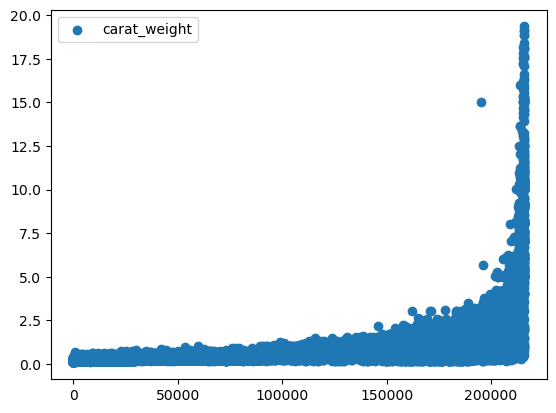

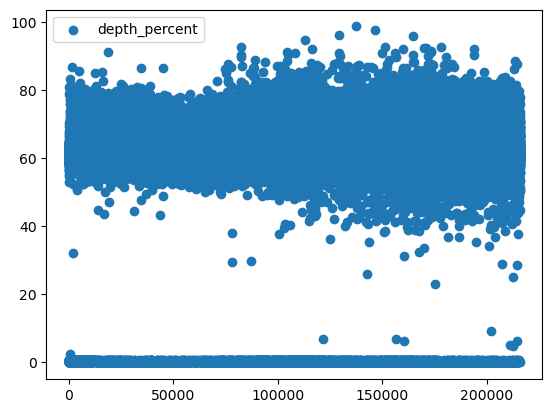

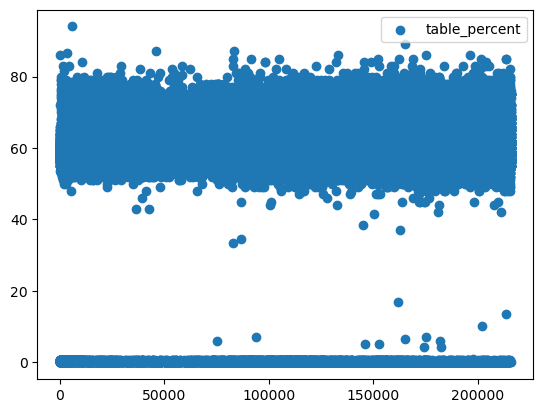

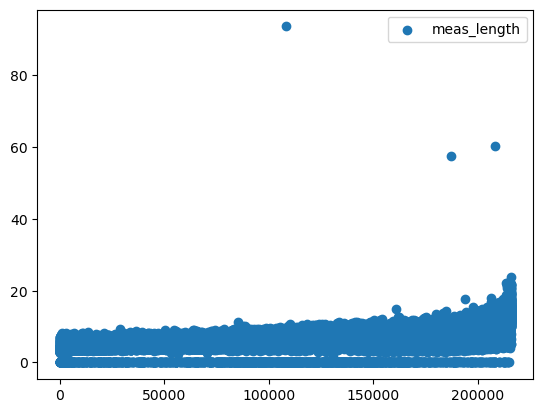

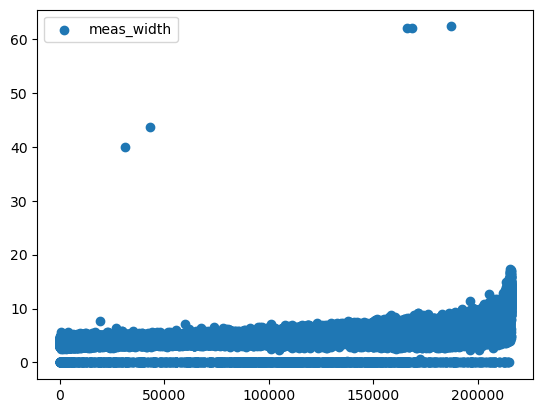

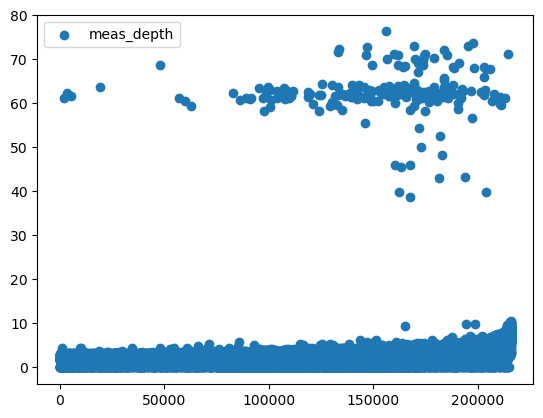

In [17]:
for i in df:
    r=df[i].dtypes
    if r== 'float64':
        plt.scatter(range(len(df[i])), df[i], label=i)
        plt.legend()
        plt.show()

In [18]:
df = df[(df.meas_length < 40)]
df = df[(df.meas_width < 30 )]
df = df[(df.meas_depth < 30)]

In [19]:
df[(df.meas_length == 0) | (df.meas_width == 0) | (df.meas_depth == 0) | (df.depth_percent == 0 ) | (df.table_percent == 0)]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
24,10,8,0,0.34,0,2,0,0,4,8,...,0.00,9,9,5,7,12,10,7,9,204
25,10,2,9,0.09,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,204
26,10,1,9,0.09,4,2,4,4,4,8,...,0.00,9,9,5,4,12,10,7,9,204
44,10,0,7,0.11,0,2,4,0,4,8,...,0.00,9,9,5,7,12,10,7,9,222
45,10,1,7,0.11,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218830,10,1,4,5.07,0,0,0,4,4,3,...,0.00,9,9,0,1,12,10,7,9,160984
219389,7,10,10,15.52,5,0,4,0,4,8,...,6.34,1,3,5,7,11,1,7,3,302640
219415,10,2,7,6.28,0,0,0,0,4,3,...,7.24,4,4,5,7,12,10,7,9,320733
219530,7,4,7,11.95,5,1,4,0,4,8,...,7.76,1,1,5,1,12,10,7,9,408347


In [20]:
df2 = df.copy()
df2 = df2[(df2.meas_width !=0)]
df2 = df2[(df2.meas_length !=0)]
df2 = df2[(df2.meas_depth !=0)]
df2 = df2[(df2.table_percent !=0)]
df2 = df2[(df2.depth_percent !=0)]

In [21]:
df2.shape

(210513, 25)

In [22]:
df.shape

(215599, 25)

<Axes: >

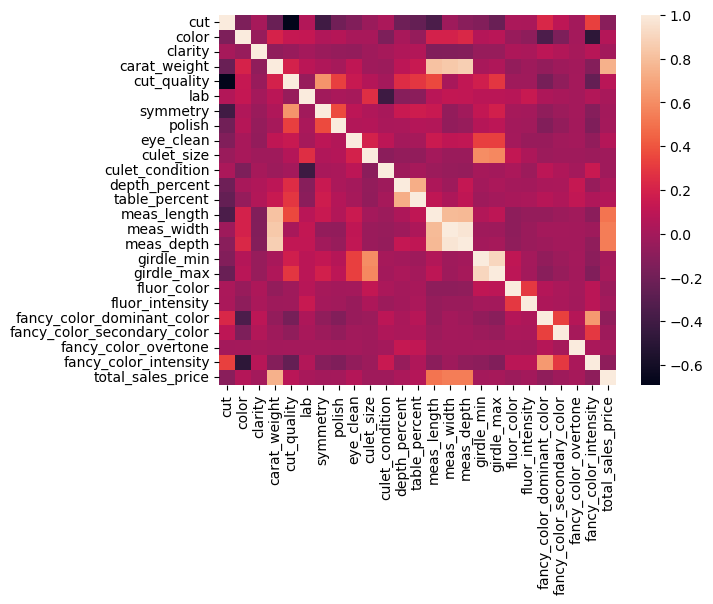

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss=MinMaxScaler()
corr = df2.corr()
sns.heatmap(corr)

In [24]:
features=[]
for i in df2:
    if i != 'total_sales_price':
        features.append(i)
print(features)

['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [25]:
X = df2[features]
y = df2['total_sales_price']
print(X.shape)
print(y.shape)

(210513, 24)
(210513,)


In [31]:
from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import f_regression
fs = skb(f_regression,k='all')
fs.fit(X,y)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i,fs.scores_[i]))

Feature 0: 2350.245825
Feature 1: 762.745835
Feature 2: 7.404681
Feature 3: 262560.922842
Feature 4: 1256.060366
Feature 5: 51.814592
Feature 6: 15.197575
Feature 7: 0.755202
Feature 8: 699.842038
Feature 9: 61.599192
Feature 10: 93.900701
Feature 11: 178.097669
Feature 12: 796.564783
Feature 13: 73702.352007
Feature 14: 87254.214321
Feature 15: 87641.854961
Feature 16: 0.246595
Feature 17: 9.204295
Feature 18: 191.829958
Feature 19: 1.741475
Feature 20: 1217.865325
Feature 21: 114.291335
Feature 22: 6.850899
Feature 23: 1492.602215


C:\Users\akhil\anaconda3\envs\main\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
fs = skb(f_regression,k=15)
Xnew = fs.fit_transform(X,y)
f = np.array(features)
flit = fs.get_support()
f = f[flit]
print(f,len(f))

['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'culet_condition'
 'depth_percent' 'table_percent' 'meas_length' 'meas_width' 'meas_depth'
 'fluor_color' 'fancy_color_dominant_color' 'fancy_color_secondary_color'
 'fancy_color_intensity'] 15


C:\Users\akhil\anaconda3\envs\main\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
Xnew = X
y = y.values.reshape(-1,1)
print(Xnew.shape)
print(y.shape)

(210513, 24)
(210513, 1)


In [29]:
print(Xnew,Xnew.shape)
print(y,y.shape)

        cut  color  clarity  carat_weight  cut_quality  lab  symmetry  polish  \
0        10      1       10          0.09            0    2         4       4   
1        10      1       10          0.09            4    2         4       4   
2        10      1       10          0.09            0    2         4       4   
3        10      1       10          0.09            0    2         4       4   
4        10      1       10          0.09            4    2         4       0   
...     ...    ...      ...           ...          ...  ...       ...     ...   
219698   10      1        7         10.65            0    0         0       0   
219699    9     10        8          5.17            5    0         4       4   
219700   10      1        7         18.07            0    0         0       0   
219701    8     10        5          0.90            5    0         2       2   
219702    7     10       10         10.03            5    0         4       0   

        eye_clean  culet_si

In [30]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(Xnew,y,test_size=0.2,random_state=40)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(168410, 24) (168410, 1)
(42103, 24) (42103, 1)


In [33]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,y_train)
print("Intercept: ",mlr.intercept_)
print("Coeffs: ", list(zip(X, mlr.coef_)))

Intercept:  [47853.41838876]
Coeffs:  [('cut', array([ 6.64106881e+02, -7.55473976e+02,  2.74657930e+02,  3.94633273e+04,
       -3.30389126e+01, -2.32512024e+03,  5.34062542e+01,  4.83886747e+00,
        4.22876510e+02,  4.63440504e+00, -3.05057033e+03,  2.72438705e+02,
       -3.43603064e+02, -3.01793630e+03,  4.08656979e+03, -1.86438677e+04,
        1.53578546e+01,  2.41573621e+00,  6.11352442e+01,  5.75474647e+01,
       -2.07327782e+03,  8.15065750e+01,  1.91558061e+03,  1.36076593e+02]))]


In [34]:
y_pred_mlr = mlr.predict(X_test)

In [35]:
from sklearn import metrics

MABE = metrics.mean_absolute_error(y_test, y_pred_mlr)
r2 = mlr.score(X_test,y_test)*100

print("R squared score: ",r2)
print("Mean absolute error: ",MABE)

R squared score:  64.33548379262652
Mean absolute error:  4020.100910360372


In [39]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Dense(units=100,input_dim=24,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=50,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal'))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(X_train,y_train,validation_split=0.2,batch_size=2000,epochs=50,verbose=1)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 749437376.0000 - val_loss: 688840256.0000
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 729988352.0000 - val_loss: 652435840.0000
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 698930240.0000 - val_loss: 640501056.0000
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 694859776.0000 - val_loss: 638249472.0000
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 692270336.0000 - val_loss: 635341376.0000
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 688652032.0000 - val_loss: 630985600.0000
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 683050432.0000 - val_loss: 624003904.0000
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 673590208.0000 - val_loss: 611620992.0000
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 657206080.0000 - val_loss: 591196544.0000
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 631339520.0000 - val_loss: 5613

In [ ]:
pd.DataFrame(history.history).plot(figsize= (10,10) )